# Random Forest - ohne "service"-Straßen

Wir wollen prüfen, ob die Straße "service" für unsere Vorhersage relevant ist und führen deshalb ein Training mit dem Datensatz ohne diesen Straßentyp durch.  

Das Vorgehen zum Optimieren des Modells ist grundsätzlich wie im notebook: [Random Forest mit "service" Straßen](random_forest/random_forest_2.ipynb)
und dort genauer beschrieben.

In [2]:
import pandas as pd
import geopandas as gpd

# GeoJSON-Datei laden
gdf = gpd.read_file('../../../data/processed_data/simra_osm_no_service_all.geojson')

# Entfernen der Polygone (Geometrie) und nicht benötigter Spalten (type ist ein Feature von SimRa und kann deshlab nicht genutzt werden)
df = gdf.drop(columns=['markers', 'id', 'index_right', 'geometry', 'highway', 'incidents', 'rides', 'type'])


# Anzeigen der ersten Zeilen und Spaltennamen, um zu prüfen, wie die Daten aussehen
df.head()

,score,maxspeed,asphalt,concrete,paving_stone,sett,unpaved,cycleway,footway,highway_rare,living_street,path,primary,residential,secondary,tertiary,track
0,0.0,50,0.000000,1.0,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.000000,0.750000,0.000000,0.0
1,0.0,30,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0
2,0.0,50,0.846154,0.0,0.0,0.0,0.153846,0.384615,0.0,0.0,0.0,0.0,0.0,0.153846,0.461538,0.000000,0.0
3,0.0,30,0.500000,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0
4,0.0,50,1.000000,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.666667,0.0


In [3]:
df.columns

Index(['score', 'maxspeed', 'asphalt', 'concrete', 'paving_stone', 'sett',
       'unpaved', 'cycleway', 'footway', 'highway_rare', 'living_street',
       'path', 'primary', 'residential', 'secondary', 'tertiary', 'track'],
      dtype='object')

In [4]:
# Zielvariable (Score) definieren
y = df['score']

In [5]:
# Alle anderen Spalten als Features verwenden ('score')
X = df.drop(columns=['score'])

In [6]:
from sklearn.model_selection import train_test_split

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Anzahl der Trainingsdaten: {X_train.shape[0]}")
print(f"Anzahl der Testdaten: {X_test.shape[0]}")

Anzahl der Trainingsdaten: 12434
Anzahl der Testdaten: 3109


der Datensatz ist kleiner als der ursprüngliche, weil die service-Straßen weggefallen sind.

In [7]:
from sklearn.ensemble import RandomForestRegressor  # Verwende RandomForestRegressor für Regression

# Random Forest Regressor Modell erstellen
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Modell trainieren
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Vorhersagen auf den Testdaten
y_pred = rf.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mittlere quadratische Fehler (MSE): {mse:.4f}")
print(f"Bestimmtheitsmaß (R^2): {r2:.4f}")

Mittlere quadratische Fehler (MSE): 0.0018
Bestimmtheitsmaß (R^2): -0.0914


**1. Mittlere quadratische Fehler (MSE): 0.0018**

- Interpretation: Der MSE ist eine Maßzahl für den durchschnittlichen quadratischen Fehler der Vorhersagen deines Modells. Ein MSE von 0.0018 ist relativ niedrig, was darauf hindeutet, dass die durchschnittliche Abweichung zwischen den vorhergesagten Werten und den tatsächlichen Werten klein ist. In absoluten Zahlen gesagt, bedeutet dies, dass die Vorhersagen im Durchschnitt nur um etwa 0.0018 Einheiten von den tatsächlichen Werten abweichen.

- Bedeutung: Da der MSE durch quadratische Abweichungen beeinflusst wird, sind größere Fehler stärker gewichtet. Ein niedriger MSE ist generell gut, aber der Wert muss im Kontext der Zielvariablen betrachtet werden. Wenn deine Zielvariable sehr kleine Werte hat, könnte ein MSE von 0.0018 relativ groß erscheinen, während er bei größeren Werten als akzeptabel gelten könnte.

**2. Bestimmtheitsmaß (R²): -0.0914**

- Interpretation: Der R²-Wert, auch Bestimmtheitsmaß genannt, gibt an, wie gut das Modell die Varianz der Zielvariable erklärt. Ein R²-Wert von -0.0914 bedeutet, dass das Modell schlechter abschneidet als ein Modell, das einfach den Mittelwert der Zielvariablen als Vorhersage verwendet. Der R²-Wert kann negativ werden, wenn das Modell sehr schlecht ist.

- Bedeutung: Ein negativer R²-Wert deutet darauf hin, dass das Modell nicht nur ungenau ist, sondern auch schlechter abschneidet als ein sehr einfaches Modell, das immer den Mittelwert vorhersagt. Dies ist ein starkes Indiz dafür, dass das Modell in seiner aktuellen Form keine nützlichen Vorhersagen liefert.

**Zusammenfassung:**

- MSE (0.0018): Der MSE ist relativ niedrig, was darauf hindeutet, dass die Vorhersagen im Durchschnitt relativ nah an den tatsächlichen Werten liegen. Dies allein gibt jedoch nicht die gesamte Geschichte wieder, insbesondere wenn der R²-Wert niedrig ist.

- R² (-0.0914): Ein negativer R²-Wert zeigt, dass das Modell schlechter abschneidet als ein einfaches Mittelwertmodell und deutet darauf hin, dass die Vorhersagen des Modells nicht nützlich sind. Dies weist auf grundlegende Probleme bei der Modellierung hin.

### Anwendung MinMaxScaler auf Zeilvariable

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Konvertiere die Pandas Series in NumPy Arrays und skaliere
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))


In [10]:
y_train_pred = rf.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Trainings-MSE: {mse_train:.4f}")
print(f"Trainings-R^2: {r2_train:.4f}")


Trainings-MSE: 0.0015
Trainings-R^2: 0.2351


In [11]:
# Berechne Vorhersagen auf den Testdaten
y_test_pred = rf.predict(X_test)

# Berechne MSE und R² für Testdaten
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test-MSE: {mse_test:.4f}")
print(f"Test-R^2: {r2_test:.4f}")

Test-MSE: 0.0018
Test-R^2: -0.0914


  **Cross-Validation**

In [12]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Cross-Validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-Validation MSE: {cv_mse:.4f}")

# Vorhersagen durch Cross-Validation
cv_predictions = cross_val_predict(rf, X, y, cv=5)
cv_mse = mean_squared_error(y, cv_predictions)
cv_r2 = r2_score(y, cv_predictions)

print(f"Cross-Validation MSE: {cv_mse:.4f}")
print(f"Cross-Validation R^2: {cv_r2:.4f}")

Cross-Validation MSE: 0.0020
Cross-Validation MSE: 0.0020
Cross-Validation R^2: -0.0797


**Ergebnisse**

- Ursprüngliche Testdaten:
        Test-MSE: 0.0018
        Test-R²: -0.0914

- Cross-Validation:
        Cross-Validation MSE: 0.0020
        Cross-Validation R²: -0.0797

Interpretation

MSE:
        Der MSE von 0.0018 auf den Testdaten ist besser als der Cross-Validation MSE von 0.0020. Das bedeutet, dass dein Modell auf den spezifischen Testdaten etwas besser abgeschnitten hat als im Durchschnitt über die Cross-Validation. Dies könnte auf Overfitting hindeuten, da das Modell möglicherweise die spezifischen Muster in den Testdaten gut erfasst hat, aber nicht so gut auf anderen Datensätzen funktioniert.

R²:
        Der R²-Wert ist bei den Cross-Validation-Ergebnissen (-0.0797) besser als der Test-R² (-0.0914). Dies deutet darauf hin, dass das Modell in der Cross-Validation in der Lage war, die Varianz der Zielvariable besser zu erklären, auch wenn beide Werte negativ sind. Ein negativer R²-Wert in beiden Fällen zeigt an, dass das Modell insgesamt nicht gut performt, aber die Cross-Validation zeigt eine etwas bessere allgemeine Fähigkeit.

**Fazit**

Die Cross-Validation gibt dir einen stabileren und weniger verzerrten Einblick in die Modellleistung, da sie auf mehreren Unterteilungen der Daten basiert.
    Der geringfügig bessere MSE auf den Testdaten könnte auf Overfitting hindeuten.
    Beide Metriken zeigen, dass das Modell insgesamt nicht optimal ist und weitere Optimierungen oder Anpassungen erfordert. Es könnte hilfreich sein, Hyperparameter zu optimieren, neue Features zu erstellen oder verschiedene Modelle auszuprobieren, um die Leistung zu verbessern.

**Hyperparametertuning**

In [13]:
# Überprüfe die Hyperparameter des Modells
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimierter Test-MSE: {mse_best:.4f}")
print(f"Optimiertes Test-R^2: {r2_best:.4f}")

Optimierter Test-MSE: 0.0016
Optimiertes Test-R^2: -0.0136


**Verbesserte Leistung:** Das Hyperparameter-Tuning hat die Vorhersagegenauigkeit verbessert (niedrigerer MSE).  

**Erklärungsfähigkeit:** Die Erklärungsfähigkeit des Modells (R²) bleibt jedoch suboptimal.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definiere die Hyperparameter-Suchraum
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialisiere das Modell
rf = RandomForestRegressor(random_state=42)

# Führe RandomizedSearchCV durch
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Hole den besten Schätzer und zeige die besten Parameter und den besten Score an
best_rf = random_search.best_estimator_
print("Beste Parameter gefunden:")
print(random_search.best_params_)
print("Bester Score (neg_mean_squared_error):")
print(random_search.best_score_)


Beste Parameter gefunden:
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 12, 'n_estimators': 186}
Bester Score (neg_mean_squared_error):
-0.0019266202342017637


**besteds Model auf Tesdatensatz überprüfen**

In [15]:
y_test_pred = best_rf.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test-MSE: {mse_test:.4f}")
print(f"Test-R^2: {r2_test:.4f}")


Test-MSE: 0.0016
Test-R^2: 0.0043


**Stabile Leistung:** Das Modell hat mit den neuen Hyperparametern stabilere Ergebnisse erzielt, ohne die MSE zu verschlechtern.  

**Verbesserungsbedarf:** Der R²-Wert zeigt, dass es weiterhin Raum für Verbesserungen gibt, um die Modellanpassung zu optimieren.

#### Featureanalyse

In [16]:
importances = best_rf.feature_importances_
feature_importance = pd.DataFrame(importances, index=X_train.columns, columns=["Importance"]).sort_values("Importance", ascending=False)
print(feature_importance)

               Importance
unpaved          0.119984
residential      0.107454
maxspeed         0.105322
asphalt          0.104492
tertiary         0.100208
secondary        0.086462
highway_rare     0.072708
footway          0.067576
cycleway         0.060962
primary          0.051303
path             0.050885
living_street    0.032018
concrete         0.019768
paving_stone     0.012890
track            0.006922
sett             0.001046


**Wichtigeste Features:**

unpaved (0.119984): Das wichtigste Feature, was darauf hindeutet, dass unbefestigte Straßen einen großen Einfluss auf die Zielvariable haben.
residential (0.107454) und maxspeed (0.105322): Beide Merkmale sind ebenfalls sehr wichtig und zeigen, dass Wohngebiete und Geschwindigkeitsbegrenzungen eine Rolle spielen.
asphalt (0.104492) und tertiary (0.100208): Diese Merkmale sind ebenfalls relevant, was darauf hindeutet, dass der Straßenbelag und die Straßenkategorie entscheidend sind.

**Weniger wichtige Merkmale:**

track (0.006922) und sett (0.001046): Diese Features haben eine sehr geringe Wichtigkeit und könnten möglicherweise entfernt werden, um das Modell zu vereinfachen und die Berechnungszeit zu reduzieren.

**--> Modell mit den wichtigsten Features testen:**

In [17]:
important_features = ['unpaved', 'residential', 'asphalt', 'tertiary', 'maxspeed'] 
X_important = X_train[important_features]
best_rf.fit(X_important, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=12, n_estimators=186, random_state=42)

In [18]:
X_test_important = X_test[important_features]  # Nur die wichtigen Features im Testset verwenden
y_test_pred_important = best_rf.predict(X_test_important)

In [19]:
mse_test_important = mean_squared_error(y_test, y_test_pred_important)
r2_test_important = r2_score(y_test, y_test_pred_important)

print(f"Test-MSE mit wichtigen Features: {mse_test_important:.4f}")
print(f"Test-R^2 mit wichtigen Features: {r2_test_important:.4f}")

Test-MSE mit wichtigen Features: 0.0016
Test-R^2 mit wichtigen Features: 0.0025


- MSE:
        Der Test-MSE bleibt bei 0.0016, was bedeutet, dass die Vorhersagegenauigkeit mit den wichtigsten Features gleich geblieben ist. Das ist positiv, da es zeigt, dass das Modell trotz der Reduzierung der Features stabil bleibt.

- R²:
        Der Test-R² von 0.0025 ist ebenfalls leicht verbessert im Vergleich zu vorherigen R²-Werten. Dies zeigt, dass das Modell mit den wichtigsten Features etwas besser in der Lage ist, die Varianz der Zielvariable zu erklären.

**Fazit**

- Stabilität: Die Verwendung der wichtigsten Features hat die Modellleistung nicht verschlechtert und zeigt sogar eine leichte Verbesserung im R².
- Effizienz: Indem du dich auf die wichtigsten Merkmale konzentrierst, kannst du die Komplexität des Modells reduzieren, was oft zu einer besseren Generalisierbarkeit führt.

#### Feature Engineering
**Transformation mit Logarithmus**

In [20]:
import numpy as np
y_train_log = np.log1p(y_train)  # log1p für log(1 + y), um mit Nullwerten umzugehen
y_test_log = np.log1p(y_test)

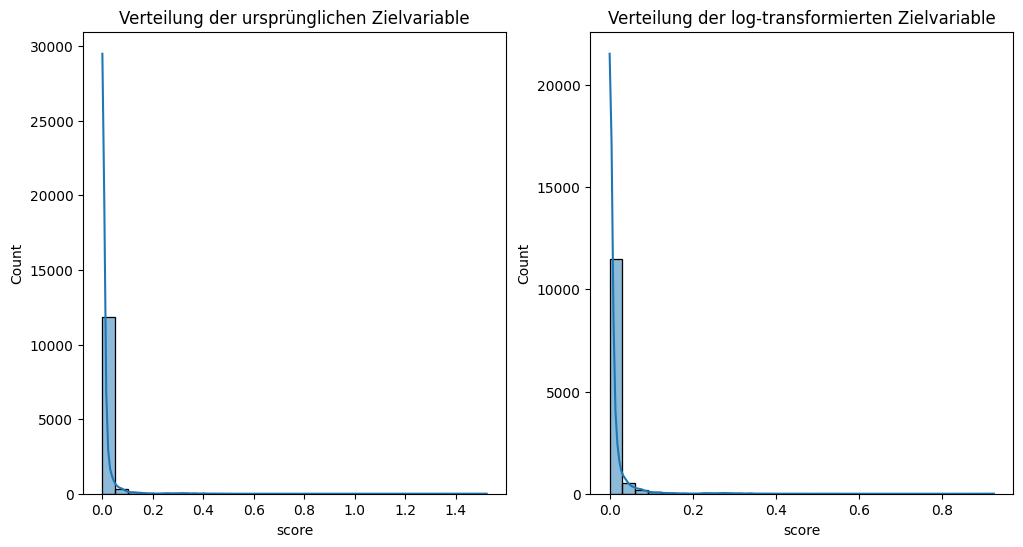

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Originale Zielvariable
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_train, bins=30, kde=True)
plt.title('Verteilung der ursprünglichen Zielvariable')

# Transformierte Zielvariable
plt.subplot(1, 2, 2)
sns.histplot(y_train_log, bins=30, kde=True)
plt.title('Verteilung der log-transformierten Zielvariable')

plt.show()

In [22]:
print("Ursprüngliche Zielvariable:")
print(f"Mittelwert: {np.mean(y_train)}")
print(f"Median: {np.median(y_train)}")
print(f"Standardabweichung: {np.std(y_train)}")

print("\nTransformierte Zielvariable:")
print(f"Mittelwert: {np.mean(y_train_log)}")
print(f"Median: {np.median(y_train_log)}")
print(f"Standardabweichung: {np.std(y_train_log)}")

Ursprüngliche Zielvariable:
Mittelwert: 0.010442051234983086
Median: 0.0
Standardabweichung: 0.04390188641717323

Transformierte Zielvariable:
Mittelwert: 0.009667583164701494
Median: 0.0
Standardabweichung: 0.03569691590619583


- Mittelwert:

    Der Mittelwert der transformierten Zielvariable ist leicht niedriger als der ursprüngliche Mittelwert. Dies ist normal, da die log-Transformation in der Regel die Werte komprimiert.

- Median:

    Der Median bleibt bei 0, was darauf hindeutet, dass ein erheblicher Teil der Daten immer noch 0-Werte enthält. Das ist häufig bei Datensätzen mit vielen Nullen.

- Standardabweichung:

    Die Standardabweichung ist nach der Transformation geringer, was darauf hinweist, dass die Verteilung der Zielvariable nach der log-Transformation weniger streut. Dies könnte das Modell dabei unterstützen, die Muster in den Daten besser zu lernen, da extreme Ausreißer weniger Einfluss haben.

**Testen auf Trainingsdaten**

In [23]:
best_rf.fit(X_train, y_train_log)  # trainiere mit der transformierten Zielvariable
y_test_pred_log = best_rf.predict(X_test)

# Rücktransformation der Vorhersagen
y_test_pred = np.expm1(y_test_pred_log)  # expm1 für exp(y) - 1

# Berechne MSE und R²
mse_test_log = mean_squared_error(y_test, y_test_pred)
r2_test_log = r2_score(y_test, y_test_pred)

print(f"Test-MSE nach Transformation: {mse_test_log:.4f}")
print(f"Test-R^2 nach Transformation: {r2_test_log:.4f}")

Test-MSE nach Transformation: 0.0016
Test-R^2 nach Transformation: 0.0045


- Test-MSE:

    Der Test-MSE bleibt bei 0.0016, was darauf hindeutet, dass die Vorhersagegenauigkeit stabil geblieben ist. Dies ist positiv, da es zeigt, dass die Transformation die Leistung nicht verschlechtert hat.

- Test-R²:

    Der R²-Wert von 0.0045 zeigt eine leichte Verbesserung im Vergleich zu vorherigen Werten. Auch wenn er immer noch niedrig ist, deutet dies darauf hin, dass das Modell mit der transformierten Zielvariable etwas besser in der Lage ist, die Varianz der Zielvariable zu erklären.

**Transformation mit Quadratwurzel**

In [24]:
# Quadratwurzel-Transformation auf den ursprünglichen Zielvariablen
y_train_sqrt = np.sqrt(y_train)
y_test_sqrt = np.sqrt(y_test)


In [25]:
best_rf.fit(X_train, y_train_sqrt)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=12, n_estimators=186, random_state=42)

In [26]:
y_test_pred_sqrt = best_rf.predict(X_test)

In [27]:
y_test_pred = y_test_pred_sqrt ** 2


In [28]:
mse_test_sqrt = mean_squared_error(y_test, y_test_pred)
r2_test_sqrt = r2_score(y_test, y_test_pred)

print(f"Test-MSE nach Quadratwurzel-Transformation: {mse_test_sqrt:.4f}")
print(f"Test-R^2 nach Quadratwurzel-Transformation: {r2_test_sqrt:.4f}")

Test-MSE nach Quadratwurzel-Transformation: 0.0017
Test-R^2 nach Quadratwurzel-Transformation: -0.0414


Im Vergleich zur log-Transformation scheint die Quadratwurzel-Transformation die Modellleistung nicht zu verbessern. Während der MSE nur geringfügig schlechter ist, ist der negative R²-Wert ein starkes Zeichen dafür, dass das Modell Schwierigkeiten hat, die Daten zu erklären.

### Vergleich mit Random Forest mit den Service Straßen:


Modell ohne service:

    Mittlere quadratische Fehler (MSE): 0.0016 
    Bestimmtheitsmaß (R²): 0.0045


Modell mit service:
    
    Mittlere quadratische Fehler (MSE): 0.0022
    Bestimmtheitsmaß (R²): 0.0058 


Gesamtbewertung:

Modell ohne service:
 - Vorteil: Bessere Vorhersagegenauigkeit (niedriger MSE).
   
Modell mit service:
 - Vorteil: Höhere Erklärung der Varianz (höherer R²).

**Fazit:**

Wenn die Vorhersagegenauigkeit für die Anwendung wichtiger ist, ist das Modell ohne service insgesamt besser. Wenn das Erklären der Varianz vorrangig ist, könnte das andere besser geeignet sein.

In vielen praktischen Anwendungen wird jedoch der MSE als entscheidender betrachtet, sodass das Modell ohne service als die insgesamt bessere Wahl angesehen werden kann. Jedoch ist auch dieses Modell ebenfalls nicht geignet für genaue Vorhersagen.